Business problem: FanDuel, a popular sports betting site, is interested in capitalizing on the recent sports card boom and wants to implement a paid tool to provide sports card investment advice. While young stars (under 25 yrs old) have been the hottest part of the market, recently legends and Hall-of-Famers have also seen increases in card prices. This provides an excellent investment opportunity in the middle group: proven veterans who are on track to make the Hall of Fame. FanDuel is interested in a tool that can identify Hall of Fame worthy players to invest and provide advice to clients early.  

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import all batting statistics. The data is broken up into Hall-of-Famers, Retired Non-Hall-of-Fame/Former All-Stars, and Active All-Stars. 

The last dataset includes every era in MLB history, with start and end years. For this one, actual MLB "eras" stopped being recorded after the Expansion era, which ended in 1973. Thus, I added makeshift eras, one between 1974 and the 21st century and one from 2000 until present 2020.

- https://stathead.com/tiny/O0i63 Hall of Fame data link
- https://stathead.com/tiny/4lBX0 Retired All Stars data link
- https://stathead.com/tiny/QsiK8 Active All Stars data link

In [3]:
hof_df = pd.read_csv('data/hof_stats.csv') # Hall-of-Fame
non_hof_df = pd.read_csv('data/retired_non_hof.csv') # Retired (non-HOF, former AS)
active_df = pd.read_csv('data/active_allstars.csv') # Active All-Stars

eras_df = pd.read_csv('data/mlb_history_eras.csv') # All eras in MLB history

datasets = [hof_df, non_hof_df, active_df]

In [4]:
eras_df

,Era,Start,End
0,19th Century,1846,1900
1,Dead Ball,1901,1919
2,Lively Ball,1920,1945
3,Post-War,1946,1960
4,Expansion,1961,1973
5,Pre-2000s,1974,1999
6,21st Century,2000,2020


In [5]:
hof_df.head()

,Rk,Player,WAR/pos,WAA/pos,From,To,Age,G,PA,AB,...,SF,GDP,SB,CS,BA,OBP,SLG,OPS,Pos,Tm
0,1,Hank Aaron\aaronha01,143.1,93.0,1954,1976,20-42,3298,13941,12364,...,121.0,328.0,240,73.0,0.305,0.374,0.555,0.928,*9783DH/45,MLN-ATL-MIL
1,2,Pete Alexander\alexape01,3.0,3.0,1911,1930,24-43,703,1981,1810,...,NaN,NaN,3,5.0,0.209,0.242,0.275,0.517,*1/H7,PHI-CHC-STL
2,3,Roberto Alomar\alomaro01,67.0,32.5,1988,2004,20-36,2379,10400,9073,...,97.0,206.0,474,114.0,0.300,0.371,0.443,0.814,*4/HD6,SDP-TOR-BAL-CLE-NYM-CHW-ARI
3,4,Cap Anson\ansonca01,94.4,55.4,1871,1897,19-45,2524,11331,10281,...,NaN,6.0,277,16.0,0.334,0.394,0.447,0.841,*352/794681,ROK-ATH-CHC
4,5,Luis Aparicio\aparilu01,55.9,20.5,1956,1973,22-39,2599,11231,10230,...,76.0,184.0,506,136.0,0.262,0.311,0.343,0.653,*6/H,CHW-BAL-BOS


In [6]:
hof_df.describe()

,Rk,WAR/pos,WAA/pos,From,To,G,PA,AB,R,H,...,HBP,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,...,190.000000,185.000000,81.000000,125.000000,190.000000,160.000000,190.000000,190.000000,190.000000,190.000000
mean,95.500000,57.353158,31.218421,1933.126316,1950.505263,1925.857895,8012.626316,7049.752632,1162.378947,2111.336842,...,49.168421,91.675676,67.345679,144.872000,194.010526,58.193750,0.285974,0.354111,0.433484,0.787558
std,54.992424,33.853192,23.949604,33.977348,34.546303,738.253965,3326.660076,2900.178704,535.246236,923.957569,...,45.149523,88.270599,37.335359,98.093518,218.550734,54.778743,0.049478,0.064122,0.101134,0.160052
min,1.000000,-3.800000,-4.000000,1871.000000,1890.000000,23.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.250000,42.450000,16.950000,1905.250000,1925.250000,1561.500000,6517.000000,5825.750000,915.250000,1705.750000,...,20.000000,20.000000,45.000000,55.000000,34.250000,16.000000,0.271250,0.342000,0.387500,0.747000
50%,95.500000,56.450000,28.350000,1928.000000,1946.500000,2078.000000,8686.500000,7731.000000,1252.500000,2303.500000,...,39.000000,59.000000,74.000000,155.000000,113.000000,46.000000,0.296500,0.368500,0.449500,0.817500
75%,142.750000,72.850000,39.750000,1961.000000,1979.750000,2439.750000,10275.250000,9097.750000,1541.750000,2730.500000,...,66.750000,147.000000,97.000000,217.000000,287.500000,80.750000,0.316000,0.391000,0.499750,0.881750
max,190.000000,162.100000,125.500000,1996.000000,2014.000000,3308.000000,13992.000000,12364.000000,2295.000000,4189.000000,...,287.000000,512.000000,128.000000,350.000000,1406.000000,335.000000,0.366000,0.482000,0.690000,1.164000


In [7]:
# total number of players 
print(len(hof_df) + len(non_hof_df) + len(active_df))

1103


This is a list of desriptions for each column name:

# Column Names and descriptions for batting stats
* **Player** - player first and last name
* **WAR/pos** - Wins Above Replacement for position players. A singular number that represents the number of wins a player adds to a team over a replacement.
* **WAA/pos** - Wins Above Average for position players. A singular number that represents the number of wins a player adds to a team over a league-average player.
* **From** -  year player's career began
* **To** -  year player's career ended
* **Age** -  age of career beginning/end on June 30 of the respective year
* **G** -  number of games player
* **PA** -  plate appearances
* **AB** -  at-bats
* **R** - runs scored
* **H** - hits
* **2B** - doubles
* **3B** - triples
* **HR** - home-runs
* **RBI** - runs batted in
* **BB** - walks
* **IBB** - intentional walks
* **SO** - strikeouts
* **HBP** - times hit by pitch
* **SH** - sacrifice hits (sacrifice bunts)
* **SF** - sacrifice flies
* **GDP** - double plays grounded into
* **SB** - stolen bases
* **CS** - number of times caught stealing
* **BA** - batting average
* **OBP** - on-base percentage
* **SLG** - slugging percentage
* **OPS** - on-base + slugging percentages
* **Pos** - All positions a player has played. Over 300 games denoted by * and less than 30 games denoted by /
* **Tm** - All teams a player has played on.
* **HOF** - indicates whether a player is in the hall-of-fame

The descriptions can also be found in 'data/batting_col_descriptions.md'

The first thing to do is add a column in each batting stats dataset that indicates whether a player is in the HOF.

In [8]:
# all players in hof_df are, by definition, in the HOF. So mark each player with a 1.
hof_df['HOF'] = 1

In [9]:
# all players in the other two datasets are not in the HOF. So mark each player with a 0.
non_hof_df['HOF'] = 0
active_df['HOF'] = 0

Next, I want to delete 'Rk' column as it is just another index. Then, I want to reorder the columns in a way that makes sense and make sure that each dataset has columns in the same order.

In [10]:
neworder = ['Player', 'From', 'To', 'Age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 
            'BA', 'OBP', 'SLG', 'OPS', 'SB', 'CS', 'BB', 'IBB', 'SO', 'WAR/pos', 'WAA/pos', 
            'HBP', 'SH', 'SF', 'GDP', 'Pos', 'Tm', 'HOF']

hof_df = hof_df.reindex(columns=neworder)
non_hof_df = non_hof_df.reindex(columns=neworder)
active_df = active_df.reindex(columns=neworder)

The next thing to do is to drop any players whose main position was Pitcher. All of these datasets include players who have played at least 1 game at a non-Pitcher position. However, some of these players have played most of their careers at pitcher and may skew the batting statistics (traditionally, pitchers are known to be below-average hitters).

Position is indicated on a 1-9 scale:
1 (pitcher), 2 (catcher), 3 (first baseman), 4 (second baseman), 5 (third baseman), 6 (shortstop), 7 (left fielder) 8 (center fielder), and 9 (right fielder). In the datasets, the position with an * in front of it is considered a player's main position (i.e. where he played the most games). So any player with a 1 following the asterisk is a pitcher.

In [11]:
# player at index 1 is a pitcher
hof_df['Pos']

0       *9783DH/45
1            *1/H7
2           *4/HD6
3      *352/794681
4             *6/H
          ...     
185      *97D8H/35
186      *73D8/H59
187          *1/3H
188        *9/4H87
189       *68D/7H3
Name: Pos, Length: 190, dtype: object

In [12]:
# find all pitchers and drop them
index_names = hof_df[hof_df['Pos'].str.contains("\*1")].index
hof_df.drop(index_names, inplace = True)

index_names = non_hof_df[non_hof_df['Pos'].str.contains("\*1")].index
non_hof_df.drop(index_names, inplace = True) 

index_names = active_df[active_df['Pos'].str.contains("\*1")].index
active_df.drop(index_names, inplace = True) 

Another thing we want to do is edit the name column, as currently they show more than just the first and last names.

In [13]:
hof_df['Player']

0            Hank Aaron\aaronha01
2        Roberto Alomar\alomaro01
3             Cap Anson\ansonca01
4         Luis Aparicio\aparilu01
5          Luke Appling\applilu01
                  ...            
184         Hack Wilson\wilsoha01
185       Dave Winfield\winfida01
186    Carl Yastrzemski\yastrca01
188         Ross Youngs\youngro01
189         Robin Yount\yountro01
Name: Player, Length: 162, dtype: object

In [14]:
hof_df['Player'] = [name[:-10] for name in hof_df['Player']]
non_hof_df['Player'] = [name[:-10] for name in non_hof_df['Player']]
active_df['Player'] = [name[:-10] for name in active_df['Player']]

In [15]:
hof_df.head()

,Player,From,To,Age,G,PA,AB,R,H,2B,...,SO,WAR/pos,WAA/pos,HBP,SH,SF,GDP,Pos,Tm,HOF
0,Hank Aaron,1954,1976,20-42,3298,13941,12364,2174,3771,624,...,1383,143.1,93.0,32,21.0,121.0,328.0,*9783DH/45,MLN-ATL-MIL,1
2,Roberto Alomar,1988,2004,20-36,2379,10400,9073,1508,2724,504,...,1140,67.0,32.5,50,148.0,97.0,206.0,*4/HD6,SDP-TOR-BAL-CLE-NYM-CHW-ARI,1
3,Cap Anson,1871,1897,19-45,2524,11331,10281,1999,3435,582,...,330,94.4,55.4,32,34.0,NaN,6.0,*352/794681,ROK-ATH-CHC,1
4,Luis Aparicio,1956,1973,22-39,2599,11231,10230,1335,2677,394,...,742,55.9,20.5,27,161.0,76.0,184.0,*6/H,CHW-BAL-BOS,1
5,Luke Appling,1930,1950,23-43,2422,10254,8856,1319,2749,440,...,528,77.1,44.1,11,74.0,NaN,129.0,*6/5H43,CHW,1


Check for missing data in all three. Each dataframe has the exact same columns, so whatever changes are made to one, will be made to the others as well.

In [16]:
hof_df.isna().sum() / len(hof_df)

Player     0.000000
From       0.000000
To         0.000000
Age        0.000000
G          0.000000
PA         0.000000
AB         0.000000
R          0.000000
H          0.000000
2B         0.000000
3B         0.000000
HR         0.000000
RBI        0.000000
BA         0.000000
OBP        0.000000
SLG        0.000000
OPS        0.000000
SB         0.000000
CS         0.111111
BB         0.000000
IBB        0.401235
SO         0.000000
WAR/pos    0.000000
WAA/pos    0.000000
HBP        0.000000
SH         0.012346
SF         0.543210
GDP        0.290123
Pos        0.000000
Tm         0.000000
HOF        0.000000
dtype: float64

Seems IBB, SF, SH, GDP, CS all have missing data. Here, the only one that might be useful to keep is IBB because the number of times a player has been intentionally walked could be an indication of how "feared" a hitter was. The reason that IBB is missing for so many players is that IBB was a new stat that was not measured until 1955. For now, we will drop the column but may return to include it.

In [17]:
non_hof_df.isna().sum() / len(non_hof_df)

Player     0.000000
From       0.000000
To         0.000000
Age        0.000000
G          0.000000
PA         0.000000
AB         0.000000
R          0.000000
H          0.000000
2B         0.000000
3B         0.000000
HR         0.000000
RBI        0.000000
BA         0.000000
OBP        0.000000
SLG        0.000000
OPS        0.000000
SB         0.000000
CS         0.005666
BB         0.000000
IBB        0.009915
SO         0.000000
WAR/pos    0.000000
WAA/pos    0.000000
HBP        0.000000
SH         0.000000
SF         0.143059
GDP        0.000000
Pos        0.000000
Tm         0.000000
HOF        0.000000
dtype: float64

Retired Non-Hall-of-Famers have missing values in IBB, SF, CS. All are droppable.

In [18]:
active_df.isna().sum() / len(active_df)

Player     0.0
From       0.0
To         0.0
Age        0.0
G          0.0
PA         0.0
AB         0.0
R          0.0
H          0.0
2B         0.0
3B         0.0
HR         0.0
RBI        0.0
BA         0.0
OBP        0.0
SLG        0.0
OPS        0.0
SB         0.0
CS         0.0
BB         0.0
IBB        0.0
SO         0.0
WAR/pos    0.0
WAA/pos    0.0
HBP        0.0
SH         0.0
SF         0.0
GDP        0.0
Pos        0.0
Tm         0.0
HOF        0.0
dtype: float64

No missing values for Active players.

Drop all columns with missing values. For consistency, any column dropped must be dropped in the other columns as well.

In [19]:
# dropping NA values
hof_df.drop(['IBB', 'SF', 'SH', 'GDP', 'CS'], axis=1, inplace=True)
non_hof_df.drop(['IBB', 'SF', 'SH', 'GDP', 'CS'], axis=1, inplace=True)
active_df.drop(['IBB', 'SF', 'SH', 'GDP', 'CS'], axis=1, inplace=True)

Now we can combine the three dataframes into one large dataframe.

In [20]:
all_df = pd.concat([hof_df, non_hof_df, active_df])
all_df

,Player,From,To,Age,G,PA,AB,R,H,2B,...,OPS,SB,BB,SO,WAR/pos,WAA/pos,HBP,Pos,Tm,HOF
0,Hank Aaron,1954,1976,20-42,3298,13941,12364,2174,3771,624,...,0.928,240,1402,1383,143.1,93.0,32,*9783DH/45,MLN-ATL-MIL,1
2,Roberto Alomar,1988,2004,20-36,2379,10400,9073,1508,2724,504,...,0.814,474,1032,1140,67.0,32.5,50,*4/HD6,SDP-TOR-BAL-CLE-NYM-CHW-ARI,1
3,Cap Anson,1871,1897,19-45,2524,11331,10281,1999,3435,582,...,0.841,277,984,330,94.4,55.4,32,*352/794681,ROK-ATH-CHC,1
4,Luis Aparicio,1956,1973,22-39,2599,11231,10230,1335,2677,394,...,0.653,506,736,742,55.9,20.5,27,*6/H,CHW-BAL-BOS,1
5,Luke Appling,1930,1950,23-43,2422,10254,8856,1319,2749,440,...,0.798,179,1302,528,77.1,44.1,11,*6/5H43,CHW,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,José Iglesias,2011,2020,21-30,841,3065,2848,325,792,163,...,0.700,52,135,371,12.4,2.0,44,*6/5HD4,BOS-DET-CIN-BAL,0
130,Tommy La Stella,2014,2020,25-31,531,1496,1316,164,360,72,...,0.754,5,143,159,4.4,-0.5,13,4H5/D31,ATL-CHC-LAA-OAK,0
131,Jeff McNeil,2018,2020,26-28,248,1024,918,137,293,63,...,0.884,12,69,123,9.4,6.2,29,4/795HD,NYM,0
132,Brock Hol,2012,2020,24-32,675,2401,2132,295,572,114,...,0.707,36,210,459,7.9,-0.2,23,457/H9638D1,PIT-BOS-WSN-MIL,0


In [21]:
all_df.describe()

,From,To,G,PA,AB,R,H,2B,3B,HR,...,OBP,SLG,OPS,SB,BB,SO,WAR/pos,WAA/pos,HBP,HOF
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,...,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,1971.117764,1984.139721,1532.065868,6135.661677,5420.498004,800.871257,1522.303393,274.645709,45.770459,165.848303,...,0.349289,0.434297,0.783584,109.972056,590.764471,769.996008,33.126447,12.794711,42.542914,0.161677
std,31.240489,29.755051,598.786248,2616.236103,2296.264232,406.521228,708.843363,133.141798,41.177368,126.863827,...,0.027925,0.055921,0.074700,140.214924,338.961018,423.169670,23.710726,17.070191,36.411631,0.368338
min,1871.000000,1890.000000,123.000000,240.000000,208.000000,43.000000,56.000000,5.000000,0.000000,0.000000,...,0.279000,0.280000,0.580000,0.000000,26.000000,23.000000,-0.400000,-5.000000,0.000000,0.000000
25%,1949.000000,1962.000000,1112.500000,4274.250000,3783.250000,498.250000,1003.250000,176.250000,19.000000,75.000000,...,0.330000,0.396250,0.736000,24.000000,346.250000,438.000000,16.500000,1.200000,19.000000,0.000000
50%,1974.000000,1989.000000,1502.000000,5942.000000,5301.000000,744.000000,1459.500000,260.000000,34.000000,131.500000,...,0.347000,0.433000,0.782000,58.500000,524.000000,693.500000,27.600000,7.950000,32.000000,0.000000
75%,1997.000000,2011.000000,1941.000000,7935.000000,7032.750000,1053.500000,1992.750000,356.000000,59.000000,232.750000,...,0.365750,0.470750,0.827000,137.000000,773.500000,1023.250000,43.900000,19.550000,53.750000,0.000000
max,2019.000000,2020.000000,3562.000000,15890.000000,14053.000000,2295.000000,4256.000000,792.000000,309.000000,762.000000,...,0.482000,0.690000,1.164000,1406.000000,2558.000000,2597.000000,162.800000,125.500000,287.000000,1.000000


Instead of dropping any column that might not be of immediate use for our model, just create a list of all column names that will be used as predictors for the model.

In [22]:
# choose statistics that will be used as predictors
predictors = ['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SB',
            'BA', 'OBP', 'SLG', 'OPS', 'WAR/pos', 'WAA/pos']

# target column is HOF indicator
target_col = ['HOF']

In [23]:
all_df[predictors]

,G,AB,R,H,2B,3B,HR,RBI,BB,SB,BA,OBP,SLG,OPS,WAR/pos,WAA/pos
0,3298,12364,2174,3771,624,98,755,2297,1402,240,0.305,0.374,0.555,0.928,143.1,93.0
2,2379,9073,1508,2724,504,80,210,1134,1032,474,0.300,0.371,0.443,0.814,67.0,32.5
3,2524,10281,1999,3435,582,142,97,2075,984,277,0.334,0.394,0.447,0.841,94.4,55.4
4,2599,10230,1335,2677,394,92,83,791,736,506,0.262,0.311,0.343,0.653,55.9,20.5
5,2422,8856,1319,2749,440,102,45,1116,1302,179,0.310,0.399,0.398,0.798,77.1,44.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,841,2848,325,792,163,12,35,271,135,52,0.278,0.319,0.381,0.700,12.4,2.0
130,531,1316,164,360,72,4,31,163,143,5,0.274,0.349,0.405,0.754,4.4,-0.5
131,248,918,137,293,63,7,30,117,69,12,0.319,0.383,0.501,0.884,9.4,6.2
132,675,2132,295,572,114,16,23,211,210,36,0.268,0.337,0.369,0.707,7.9,-0.2


In [24]:
all_df[target_col]

,HOF
0,1
2,1
3,1
4,1
5,1
...,...
129,0
130,0
131,0
132,0


In [25]:
predictors_df = all_df[predictors]
target = all_df[target_col]

Split data in train and test sets

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictors_df, target, test_size=.25, random_state=0)

K-Nearest Neighbors Model

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print(confusion_matrix(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))
print("Testing Accuracy for K-Neighbors Classifier: {:.4}%".format(accuracy_score(y_test, knn.predict(X_test)) * 100))

[[207  11]
 [ 11  22]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       218
           1       0.67      0.67      0.67        33

    accuracy                           0.91       251
   macro avg       0.81      0.81      0.81       251
weighted avg       0.91      0.91      0.91       251

Testing Accuracy for K-Neighbors Classifier: 91.24%


<ipython-input-43-d4598b4cdc2b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


# Get idea of current price of cards, and apply to diff players and trajectories, give an idea of how potential gain
# svm, random forest, xgboost, smote

Random Forest Model

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [45]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

Take a look at importance of each feature

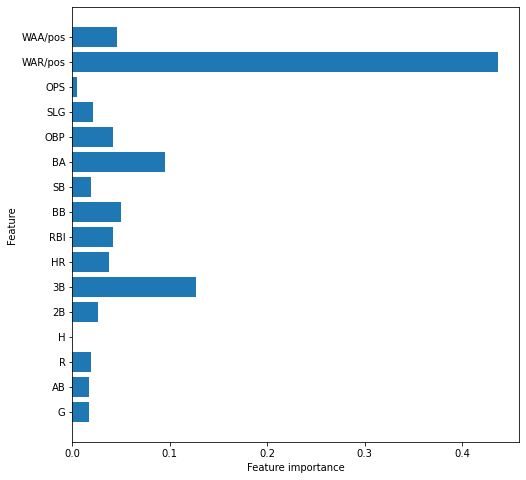

In [46]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

Let's see how well our single decision tree model fared

In [47]:
# Test set predictions
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[203  15]
 [  9  24]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       218
           1       0.62      0.73      0.67        33

    accuracy                           0.90       251
   macro avg       0.79      0.83      0.81       251
weighted avg       0.91      0.90      0.91       251

Testing Accuracy for Decision Tree Classifier: 90.44%


Let's try a grid search to see if there are better parameters for the decision tree classifier.

In [51]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = {
    'max_depth': [2, 5, 10, 25],
    'min_samples_split': [2, 5, 10, 20]
}

gs_tree = GridSearchCV(forest, param_grid, cv=3)
gs_tree.fit(X_train, np.ravel(y_train))

gs_tree.best_params_

{'max_depth': 25, 'min_samples_split': 10}

Now we want to look at a random forest classifier.

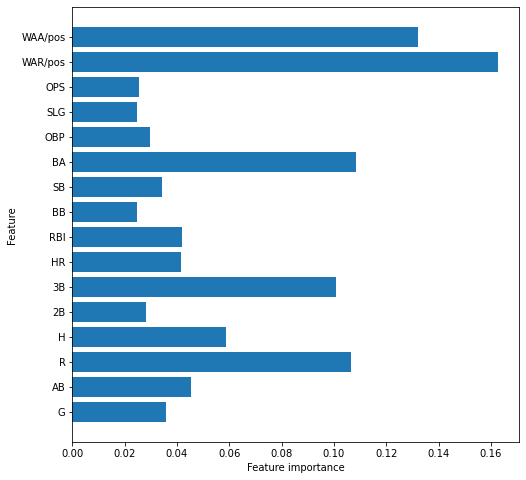

In [63]:
forest = RandomForestClassifier()
forest.fit(X_train, np.ravel(y_train))
plot_feature_importances(forest)

Let's see how this new random forest model fared

In [49]:
preds = forest.predict(X_test)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))
print("Testing Accuracy for Random Forest Classifier: {:.4}%".format(accuracy_score(y_test, preds) * 100))

[[212   6]
 [  7  26]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       218
           1       0.81      0.79      0.80        33

    accuracy                           0.95       251
   macro avg       0.89      0.88      0.89       251
weighted avg       0.95      0.95      0.95       251

Testing Accuracy for Random Forest Classifier: 94.82%
